In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv('bmd.csv')

In [3]:
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [4]:
df.drop(['id','sex','waiting_time','medication','age'], axis = 1)

,fracture,weight_kg,height_cm,bmd
0,no fracture,64.0,155.5,0.8793
1,no fracture,78.0,162.0,0.7946
2,no fracture,73.0,170.5,0.9067
3,no fracture,60.0,148.0,0.7112
4,no fracture,55.0,161.0,0.7909
...,...,...,...,...
164,fracture,74.0,164.0,0.7941
165,fracture,59.0,161.0,0.7971
166,fracture,67.0,169.0,0.8037
167,fracture,70.0,166.0,0.8072


In [5]:
df['fracture'] = df['fracture'].replace(['fracture'], '1')

In [6]:
df['fracture'] = df['fracture'].replace(['no fracture'], '0')

In [7]:
x=df[['weight_kg', 'height_cm', 'bmd']]

In [8]:
y = df[['fracture']]

In [9]:
y

,fracture
0,0
1,0
2,0
3,0
4,0
...,...
164,1
165,1
166,1
167,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [12]:
x_train.head()

,weight_kg,height_cm,bmd
118,62.0,150.5,0.8681
57,68.0,160.0,0.9716
126,50.0,149.5,0.5515
42,60.0,153.0,0.9630
54,79.0,153.0,0.7766


In [13]:
x_train.shape

(34, 3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [16]:
knn.fit(x_train, y_train)

C:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_predict = knn.predict(x_test)
accuracy_score(y_test,y_predict)

0.6962962962962963

In [19]:
size = []
for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    size.append(accuracy_score(y_test, y_predict))

C:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

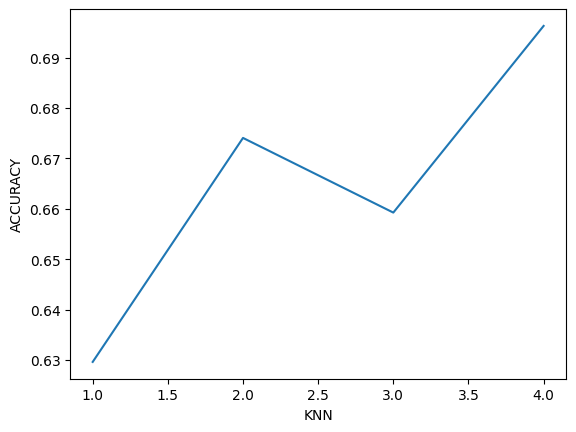

In [20]:
plt.plot(range(1,5),size)
plt.xlabel('KNN') 
plt.ylabel('ACCURACY')
plt.show() 

In [21]:
data = [68.0, 160.0, 0.9716]

In [22]:
data_new = np.array([data])

In [25]:
result= knn.predict(data_new)

C:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
result

array(['0'], dtype=object)